## 实例描述
### 在with tf.Session()函数中加入启动队列，并通过加入coord协调器的方式使session close时同步内部线程一起退出

In [1]:
from cifar10 import cifar10_input
import tensorflow as tf
import pylab

In [4]:
# 读数据
batch_size = 128
images_test,labels_test = cifar10_input.inputs(eval_data=True, batch_size=batch_size)

W0718 09:51:05.200867 17268 tf_logging.py:125] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.



 [[[ 2.0653446   2.0799093   2.0653446 ]
  [ 2.0653446   2.0799093   2.0653446 ]
  [ 2.094474    2.094474    2.0653446 ]
  ...
  [ 2.0799093   2.0799093   2.0507798 ]
  [ 2.0653446   2.094474    2.0799093 ]
  [ 2.0799093   2.0799093   2.0799093 ]]

 [[ 2.0362153   2.094474    2.0653446 ]
  [ 2.0653446   2.094474    2.0507798 ]
  [ 2.0653446   2.0799093   2.0070858 ]
  ...
  [ 2.0216506   2.0362153   2.0216506 ]
  [ 2.0362153   2.094474    2.0799093 ]
  [ 2.1090386   2.0799093   2.1090386 ]]

 [[ 1.2497224   1.3516752   1.3953692 ]
  [ 1.7594863   1.8323097   1.8468744 ]
  [ 2.0507798   2.094474    2.0799093 ]
  ...
  [ 2.1090386   2.1090386   2.1090386 ]
  [ 2.1090386   2.1090386   2.094474  ]
  [ 2.094474    2.0507798   2.0507798 ]]

 ...

 [[-0.52716905 -0.35239285 -0.33782816]
  [-0.8330274  -0.64368653 -0.6582512 ]
  [-1.0078036  -0.9058508  -0.9204155 ]
  ...
  [-0.87672144 -0.80389804 -0.86215675]
  [-0.96410954 -0.8475921  -0.8330274 ]
  [-0.86215675 -0.77476865 -0.80389804]]



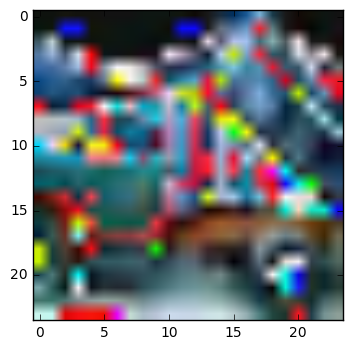

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 定义协调器
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess,coord)
    image_batch, label_batch = sess.run([images_test, labels_test])
    print("\n",image_batch[0])

    print("\n",label_batch[0])
    pylab.imshow(image_batch[0])
    pylab.show()
    coord.request_stop()